In [1]:
#load package
using Revise
using Plots
using LaTeXStrings
using LinearAlgebra
using SparseIR
using Nevanlinna

In [2]:
# Set work data Type
T = BigFloat
setprecision(128)
;

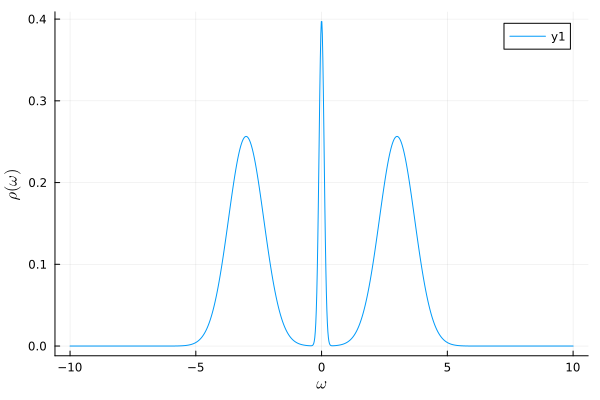

In [3]:
#define spectral function
gaussian(x, mu, sigma) = exp(-0.5*((x-mu)/sigma)^2)/(sqrt(2*π)*sigma)
rho(omega) = 0.45*gaussian(omega, -3.0, 0.7) + 0.1*gaussian(omega, 0.0, 0.1) + 0.45*gaussian(omega, 3., 0.7)
omegas = LinRange(-10, 10, 1000)
plot()
plot!(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))

In [4]:
function generate_input_data(rho::Function, beta::Float64)
    lambda = 1e+5
    wmax = lambda/beta
    basis = FiniteTempBasisSet(beta, wmax, 1e-15)

    rhol = [overlap(basis.basis_f.v[l], rho) for l in 1:length(basis.basis_f)]
    gl = - basis.basis_f.s .* rhol
    gw = evaluate(basis.smpl_wn_f, gl)
    
    hnw = length(basis.smpl_wn_f.sampling_points)÷2
    
    input_smpl = Array{Complex{T}}(undef, hnw) 
    input_gw   = Array{Complex{T}}(undef, hnw) 
    
    for i in 1:hnw
        input_smpl[i]= SparseIR.valueim(basis.smpl_wn_f.sampling_points[hnw+i], beta)
        input_gw[i]  = gw[hnw+i]
    end
    
    return input_smpl, input_gw
end

generate_input_data (generic function with 1 method)

In [5]:
beta = 100. #inverse temperature
input_smpl, input_gw = generate_input_data(rho, beta)
;

In [6]:
N_real    = 1000  #demension of array of output
omega_max = 10.0  #energy cutoff of real axis
eta       = 0.001 #broaden parameter 
sum_rule  = 1.0   #sum rule
H_max     = 50    #cutoff of Hardy basis
lambda    = 1e-4  #regularization parameter
iter_tol  = 1000  #upper bound of iteration
;

In [7]:
#construct solver struct
@time sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true)
;

N_imag is setted as 32
H=1
Iter     Function value   Gradient norm 
     0     2.389986e+01     2.966203e+01
 * time: 0.01847696304321289
     1     2.103065e+01     6.534912e-01
 * time: 1.1442439556121826
     2     1.081020e+01     3.964703e-01
 * time: 1.6397428512573242
     3     8.325376e+00     2.245325e-01
 * time: 1.8014309406280518
     4     7.128192e+00     1.929012e-01
 * time: 2.511098861694336
     5     6.979238e+00     1.621961e-01
 * time: 2.906622886657715
     6     6.940839e+00     1.238488e-01
 * time: 3.0252668857574463
     7     6.204481e+00     1.656260e-01
 * time: 3.2465898990631104
     8     6.090773e+00     1.296092e-01
 * time: 3.475550889968872
     9     5.930792e+00     1.285988e-01
 * time: 3.663774013519287
    10     5.811402e+00     5.865443e-02
 * time: 3.9291019439697266
    11     5.791662e+00     3.216907e-02
 * time: 4.100916862487793
    12     5.778214e+00     1.909340e-02
 * time: 4.3250508308410645
    13     5.777944e+00     2.389175e-0

    85     4.445176e+00     2.986855e-01
 * time: 25.8226158618927
    86     4.445171e+00     6.201487e-01
 * time: 25.95672583580017
    87     4.445168e+00     2.460439e-02
 * time: 26.128410816192627
    88     4.445166e+00     3.731849e-02
 * time: 26.314711809158325
    89     4.445165e+00     1.217735e-01
 * time: 26.45402693748474
    90     4.445165e+00     7.563337e-02
 * time: 26.623530864715576
    91     4.445165e+00     4.651419e-02
 * time: 26.797221899032593
    92     4.445165e+00     1.942025e-02
 * time: 26.97367787361145
    93     4.445165e+00     2.082452e-02
 * time: 27.109532833099365
    94     4.445165e+00     3.679009e-02
 * time: 27.288261890411377
    95     4.445165e+00     1.939467e-02
 * time: 27.473519802093506
    96     4.445165e+00     2.203561e-02
 * time: 27.653234004974365
    97     4.445165e+00     2.075862e-02
 * time: 27.78436779975891
    98     4.445165e+00     1.910054e-02
 * time: 27.956974983215332
    99     4.445165e+00     2.141242e-02

   205     4.445165e+00     2.784285e-02
 * time: 45.95361590385437
   206     4.445165e+00     2.467451e-02
 * time: 46.130271911621094
   207     4.445165e+00     2.784583e-02
 * time: 46.27199387550354
   208     4.445165e+00     2.466134e-02
 * time: 46.44311881065369
   209     4.445165e+00     2.785167e-02
 * time: 46.621131896972656
   210     4.445165e+00     2.464895e-02
 * time: 46.80287194252014
   211     4.445165e+00     2.786131e-02
 * time: 46.93509578704834
   212     4.445165e+00     2.463749e-02
 * time: 47.10699486732483
   213     4.445165e+00     2.787574e-02
 * time: 47.287014961242676
   214     4.445165e+00     2.462679e-02
 * time: 47.42500400543213
   215     4.445165e+00     2.789586e-02
 * time: 47.60187482833862
   216     4.445165e+00     2.461712e-02
 * time: 47.78248691558838
   217     4.445165e+00     2.792243e-02
 * time: 47.961750984191895
   218     4.445165e+00     2.460873e-02
 * time: 48.10613989830017
   219     4.445165e+00     2.795597e-02
 * 

   326     4.445165e+00     2.089735e-02
 * time: 67.34996390342712
   327     4.445165e+00     3.990770e-02
 * time: 67.52184081077576
   328     4.445165e+00     2.065212e-02
 * time: 67.70310378074646
   329     4.445165e+00     4.185481e-02
 * time: 67.83875298500061
   330     4.445165e+00     2.037431e-02
 * time: 68.00944995880127
   331     4.445165e+00     4.456723e-02
 * time: 68.19158387184143
   332     4.445165e+00     2.005146e-02
 * time: 68.33606386184692
   333     4.445165e+00     4.871264e-02
 * time: 68.5054337978363
   334     4.445165e+00     1.966174e-02
 * time: 68.67906999588013
   335     4.445165e+00     5.619400e-02
 * time: 68.87111592292786
   336     4.445165e+00     1.916639e-02
 * time: 69.0125138759613
   337     4.445165e+00     7.597514e-02
 * time: 69.18970489501953
   338     4.445165e+00     1.863225e-02
 * time: 69.37094688415527
   339     4.445164e+00     7.861665e-01
 * time: 69.6135618686676
   340     4.445164e+00     1.868162e-02
 * time: 7

   447     4.445163e+00     3.456881e-02
 * time: 89.11713099479675
   448     4.445163e+00     2.190906e-02
 * time: 89.25869679450989
   449     4.445163e+00     3.461884e-02
 * time: 89.44438886642456
   450     4.445163e+00     2.182453e-02
 * time: 89.62690091133118
   451     4.445163e+00     3.467284e-02
 * time: 89.81309390068054
   452     4.445163e+00     2.175912e-02
 * time: 89.9492998123169
   453     4.445163e+00     3.473198e-02
 * time: 90.13160586357117
   454     4.445163e+00     2.171335e-02
 * time: 90.32204699516296
   455     4.445163e+00     3.479248e-02
 * time: 90.50552487373352
   456     4.445163e+00     2.168467e-02
 * time: 90.6399278640747
   457     4.445163e+00     3.484905e-02
 * time: 90.81969594955444
   458     4.445163e+00     2.166930e-02
 * time: 91.00070095062256
   459     4.445163e+00     3.489740e-02
 * time: 91.13833284378052
   460     4.445163e+00     2.166274e-02
 * time: 91.33042192459106
   461     4.445163e+00     3.493646e-02
 * time: 

    65     2.215011e-01     3.195111e-07
 * time: 15.543593883514404
    66     2.215011e-01     2.691600e-07
 * time: 15.77833604812622
    67     2.215011e-01     2.095202e-07
 * time: 16.00844693183899
    68     2.215011e-01     1.744549e-07
 * time: 16.250342845916748
    69     2.215011e-01     1.329936e-07
 * time: 16.423885822296143
    70     2.215011e-01     1.129161e-07
 * time: 16.658474922180176
    71     2.215011e-01     7.516140e-08
 * time: 16.903472900390625
    72     2.215011e-01     6.966927e-08
 * time: 17.14252781867981
    73     2.215011e-01     4.101634e-08
 * time: 17.342149019241333
    74     2.215011e-01     3.941482e-08
 * time: 17.585513830184937
    75     2.215011e-01     2.323722e-08
 * time: 17.838593006134033
    76     2.215011e-01     1.975351e-08
 * time: 18.051724910736084
max_theta=0.741274630294030913783333890472863833779
hardy optimization was success.
154.156736 seconds (2.33 G allocations: 99.224 GiB, 15.25% gc time, 19.79% compilation time

In [8]:
#execute optimize
@time Nevanlinna.solve!(sol)

H=3
Iter     Function value   Gradient norm 
     0     2.215011e-01     1.975351e-08
 * time: 0.0003311634063720703
     1     2.215011e-01     1.168866e-08
 * time: 0.2510030269622803
     2     2.215011e-01     8.286587e-09
 * time: 0.44562506675720215
max_theta=0.7412746302964922132578307961253749119033
hardy optimization was success.
H=4
Iter     Function value   Gradient norm 
     0     2.215011e-01     7.106380e-01
 * time: 0.0002238750457763672
     1     2.177292e-01     9.094564e-01
 * time: 0.368602991104126
     2     2.140545e-01     1.067262e+00
 * time: 0.6544079780578613
     3     1.008674e-01     9.794334e-01
 * time: 0.9752240180969238
     4     8.811155e-02     7.214336e-01
 * time: 1.3657190799713135
     5     8.062327e-02     4.846844e-01
 * time: 1.610846996307373
     6     7.712659e-02     1.177657e+00
 * time: 1.8198039531707764
     7     6.547935e-02     7.972365e-01
 * time: 2.021920919418335
     8     5.284517e-02     4.481559e-01
 * time: 2.2891578674

    24     2.477405e-02     6.031856e-02
 * time: 7.71966814994812
    25     2.475601e-02     5.592459e-02
 * time: 7.943997144699097
    26     2.474559e-02     3.301388e-02
 * time: 8.197052001953125
    27     2.474003e-02     2.863207e-02
 * time: 8.426393985748291
    28     2.473705e-02     2.109037e-02
 * time: 8.695013999938965
    29     2.473514e-02     2.030707e-02
 * time: 8.93595004081726
    30     2.473379e-02     1.607871e-02
 * time: 9.184890031814575
    31     2.473266e-02     1.548913e-02
 * time: 9.420382022857666
    32     2.473179e-02     1.140375e-02
 * time: 9.604594945907593
    33     2.473106e-02     1.177870e-02
 * time: 9.833968162536621
    34     2.473051e-02     7.947367e-03
 * time: 10.073101997375488
    35     2.473005e-02     9.205903e-03
 * time: 10.312278985977173
    36     2.472969e-02     5.207017e-03
 * time: 10.529891014099121
    37     2.472938e-02     7.044892e-03
 * time: 10.741465091705322
    38     2.472914e-02     3.440020e-03
 * ti

    20     2.198139e-02     7.342416e-02
 * time: 6.06912899017334
    21     2.194331e-02     5.776130e-02
 * time: 6.4471681118011475
    22     2.191858e-02     6.698646e-02
 * time: 6.757940053939819
    23     2.184858e-02     2.400737e-02
 * time: 7.240005016326904
    24     2.183576e-02     4.711584e-02
 * time: 7.48675012588501
    25     2.182887e-02     1.311075e-02
 * time: 7.777915000915527
    26     2.182738e-02     3.866942e-03
 * time: 8.154256105422974
    27     2.182544e-02     1.930963e-02
 * time: 8.536853075027466
    28     2.182321e-02     1.725794e-03
 * time: 8.858269929885864
    29     2.182213e-02     1.211914e-02
 * time: 9.079587936401367
    30     2.182175e-02     5.033822e-03
 * time: 9.398802042007446
    31     2.182106e-02     6.776570e-03
 * time: 9.771136045455933
    32     2.181982e-02     8.317491e-03
 * time: 10.128633975982666
    33     2.181842e-02     9.747485e-03
 * time: 10.563712120056152
    34     2.181719e-02     5.198582e-03
 * tim

   140     2.181246e-02     1.482023e-06
 * time: 39.10021615028381
   141     2.181246e-02     1.828423e-06
 * time: 39.32201814651489
   142     2.181246e-02     1.213367e-06
 * time: 39.54448413848877
   143     2.181246e-02     1.498769e-06
 * time: 39.774333000183105
   144     2.181246e-02     9.956802e-07
 * time: 40.00405311584473
   145     2.181246e-02     1.228822e-06
 * time: 40.179551124572754
   146     2.181246e-02     8.134855e-07
 * time: 40.3935329914093
   147     2.181246e-02     9.919040e-07
 * time: 40.61353015899658
   148     2.181246e-02     6.599274e-07
 * time: 40.84092998504639
   149     2.181246e-02     7.933411e-07
 * time: 41.06791615486145
   150     2.181246e-02     5.307571e-07
 * time: 41.293588161468506
   151     2.181246e-02     6.319462e-07
 * time: 41.51118016242981
   152     2.181246e-02     4.147129e-07
 * time: 41.736112117767334
   153     2.181246e-02     5.031879e-07
 * time: 41.971835136413574
   154     2.181246e-02     3.211570e-07
 * 

    75     2.067089e-02     2.353960e-03
 * time: 21.720265865325928
    76     2.067084e-02     2.716905e-03
 * time: 22.10183596611023
    77     2.067082e-02     2.155630e-03
 * time: 22.348355054855347
    78     2.067078e-02     2.157044e-03
 * time: 22.74411392211914
    79     2.067077e-02     2.061667e-03
 * time: 22.991404056549072
    80     2.067074e-02     1.648622e-03
 * time: 23.332793951034546
    81     2.067073e-02     2.318784e-03
 * time: 23.592204093933105
    82     2.067069e-02     1.513133e-03
 * time: 23.9979350566864
    83     2.067068e-02     2.647640e-03
 * time: 24.241261959075928
    84     2.067064e-02     1.981959e-03
 * time: 24.579652070999146
    85     2.067063e-02     3.121744e-03
 * time: 24.81823992729187
    86     2.067057e-02     2.152150e-03
 * time: 25.15955686569214
    87     2.067052e-02     2.041667e-03
 * time: 25.543395042419434
    88     2.067049e-02     3.473788e-03
 * time: 25.876286029815674
    89     2.067046e-02     1.510463e-03

   195     2.067006e-02     6.978454e-06
 * time: 60.14501690864563
   196     2.067006e-02     8.285476e-06
 * time: 60.39181303977966
   197     2.067006e-02     5.633617e-06
 * time: 60.62959289550781
   198     2.067006e-02     6.581365e-06
 * time: 60.87044286727905
   199     2.067006e-02     4.747002e-06
 * time: 61.11667490005493
   200     2.067006e-02     5.377597e-06
 * time: 61.38083505630493
   201     2.067006e-02     4.094095e-06
 * time: 61.6293089389801
   202     2.067006e-02     4.590850e-06
 * time: 61.86752796173096
   203     2.067006e-02     3.570786e-06
 * time: 62.10671091079712
   204     2.067006e-02     4.030858e-06
 * time: 62.30990695953369
   205     2.067006e-02     3.099531e-06
 * time: 62.54883694648743
   206     2.067006e-02     3.559592e-06
 * time: 62.782126903533936
   207     2.067006e-02     2.646005e-06
 * time: 63.01552987098694
   208     2.067006e-02     3.080050e-06
 * time: 63.25021409988403
   209     2.067006e-02     2.211386e-06
 * time

    48     2.042074e-02     1.259211e-02
 * time: 14.133527994155884
    49     2.041991e-02     1.219244e-02
 * time: 14.372436046600342
    50     2.041910e-02     1.234873e-02
 * time: 14.618101119995117
    51     2.041837e-02     1.156921e-02
 * time: 14.861073017120361
    52     2.041770e-02     1.121013e-02
 * time: 15.103163003921509
    53     2.041712e-02     1.065021e-02
 * time: 15.34253191947937
    54     2.041661e-02     1.046652e-02
 * time: 15.581146001815796
    55     2.041617e-02     1.037318e-02
 * time: 15.818964958190918
    56     2.041576e-02     1.066869e-02
 * time: 16.061640977859497
    57     2.041541e-02     1.096012e-02
 * time: 16.307452917099
    58     2.041508e-02     1.116647e-02
 * time: 16.54566502571106
    59     2.041479e-02     1.148142e-02
 * time: 16.786881923675537
    60     2.041453e-02     1.159084e-02
 * time: 17.041486978530884
    61     2.041431e-02     1.187510e-02
 * time: 17.282093048095703
    62     2.041411e-02     1.201436e-0

   168     2.039416e-02     4.054304e-04
 * time: 45.363774061203
   169     2.039415e-02     7.926613e-04
 * time: 45.60405611991882
   170     2.039415e-02     3.981258e-04
 * time: 45.84910011291504
   171     2.039415e-02     8.178572e-04
 * time: 46.10082292556763
   172     2.039415e-02     5.051762e-04
 * time: 46.34737300872803
   173     2.039414e-02     8.732797e-04
 * time: 46.595279932022095
   174     2.039414e-02     5.892610e-04
 * time: 46.83970403671265
   175     2.039414e-02     8.757890e-04
 * time: 47.08840799331665
   176     2.039413e-02     6.548839e-04
 * time: 47.3308470249176
   177     2.039413e-02     8.190377e-04
 * time: 47.56322193145752
   178     2.039413e-02     7.059566e-04
 * time: 47.80556511878967
   179     2.039413e-02     7.615001e-04
 * time: 48.052916049957275
   180     2.039413e-02     7.366426e-04
 * time: 48.28903007507324
   181     2.039412e-02     7.537847e-04
 * time: 48.536499977111816
   182     2.039412e-02     7.425487e-04
 * time

   289     2.039393e-02     6.491122e-05
 * time: 77.315190076828
   290     2.039393e-02     7.277382e-05
 * time: 77.55818605422974
   291     2.039393e-02     6.945961e-05
 * time: 77.80104112625122
   292     2.039393e-02     7.725914e-05
 * time: 78.04901814460754
   293     2.039393e-02     7.372775e-05
 * time: 78.29156494140625
   294     2.039393e-02     8.117847e-05
 * time: 78.52933812141418
   295     2.039393e-02     7.754585e-05
 * time: 78.77668809890747
   296     2.039393e-02     8.449699e-05
 * time: 79.0190179347992
   297     2.039393e-02     8.108432e-05
 * time: 79.26508712768555
   298     2.039393e-02     8.752155e-05
 * time: 79.50827407836914
   299     2.039393e-02     8.463190e-05
 * time: 79.74959111213684
   300     2.039393e-02     9.120585e-05
 * time: 79.98987293243408
   301     2.039393e-02     8.839194e-05
 * time: 80.23356699943542
   302     2.039393e-02     9.519219e-05
 * time: 80.47300314903259
   303     2.039393e-02     9.239869e-05
 * time: 8

   410     2.039393e-02     3.178794e-07
 * time: 107.80935502052307
   411     2.039393e-02     5.017916e-07
 * time: 108.05639696121216
   412     2.039393e-02     2.679241e-07
 * time: 108.29925203323364
   413     2.039393e-02     4.389948e-07
 * time: 108.5410749912262
   414     2.039393e-02     2.271973e-07
 * time: 108.7853729724884
   415     2.039393e-02     3.682645e-07
 * time: 109.02758193016052
   416     2.039393e-02     1.896966e-07
 * time: 109.27002096176147
   417     2.039393e-02     2.966235e-07
 * time: 109.50942707061768
   418     2.039393e-02     1.624297e-07
 * time: 109.75743508338928
   419     2.039393e-02     2.331494e-07
 * time: 110.00866293907166
   420     2.039393e-02     1.431126e-07
 * time: 110.25798797607422
   421     2.039393e-02     1.865968e-07
 * time: 110.49451804161072
   422     2.039393e-02     1.250471e-07
 * time: 110.72875499725342
   423     2.039393e-02     1.657208e-07
 * time: 110.97338509559631
   424     2.039393e-02     1.050252

    75     2.029737e-02     3.000119e-03
 * time: 22.958205938339233
    76     2.029734e-02     2.011245e-03
 * time: 23.205132961273193
    77     2.029730e-02     2.897972e-03
 * time: 23.481347799301147
    78     2.029727e-02     1.877067e-03
 * time: 23.72981882095337
    79     2.029724e-02     2.747657e-03
 * time: 23.984055995941162
    80     2.029721e-02     1.783873e-03
 * time: 24.22914481163025
    81     2.029718e-02     2.518376e-03
 * time: 24.477334022521973
    82     2.029716e-02     1.665723e-03
 * time: 24.723984003067017
    83     2.029713e-02     2.207952e-03
 * time: 24.9726459980011
    84     2.029711e-02     1.498490e-03
 * time: 25.22197389602661
    85     2.029709e-02     1.882900e-03
 * time: 25.468923807144165
    86     2.029707e-02     1.300252e-03
 * time: 25.730270862579346
    87     2.029706e-02     1.597037e-03
 * time: 25.969693899154663
    88     2.029704e-02     1.138832e-03
 * time: 26.220849990844727
    89     2.029703e-02     1.386431e-0

   195     2.029634e-02     7.926354e-04
 * time: 55.531728982925415
   196     2.029634e-02     4.840489e-04
 * time: 55.99721693992615
   197     2.029633e-02     8.183511e-04
 * time: 56.31448483467102
   198     2.029633e-02     5.271886e-04
 * time: 56.82017779350281
   199     2.029633e-02     8.400196e-04
 * time: 57.132728815078735
   200     2.029633e-02     5.941748e-04
 * time: 57.636828899383545
   201     2.029633e-02     8.640545e-04
 * time: 57.96427798271179
   202     2.029633e-02     6.602107e-04
 * time: 58.42488193511963
   203     2.029633e-02     8.831668e-04
 * time: 58.73844885826111
   204     2.029633e-02     7.072429e-04
 * time: 59.19949388504028
   205     2.029633e-02     8.704930e-04
 * time: 59.453392028808594
   206     2.029632e-02     7.290624e-04
 * time: 59.815495014190674
   207     2.029632e-02     8.205073e-04
 * time: 60.09280586242676
   208     2.029632e-02     7.295239e-04
 * time: 60.53549885749817
   209     2.029632e-02     7.591237e-04
 *

   316     2.029628e-02     3.014080e-04
 * time: 87.88722085952759
   317     2.029628e-02     3.734276e-04
 * time: 88.145015001297
   318     2.029628e-02     3.094264e-04
 * time: 88.38757991790771
   319     2.029628e-02     3.800202e-04
 * time: 88.63523602485657
   320     2.029628e-02     3.173603e-04
 * time: 88.91027593612671
   321     2.029628e-02     3.866767e-04
 * time: 89.15879392623901
   322     2.029628e-02     3.253161e-04
 * time: 89.402911901474
   323     2.029628e-02     3.935166e-04
 * time: 89.6634738445282
   324     2.029628e-02     3.333680e-04
 * time: 89.90792489051819
   325     2.029628e-02     4.007435e-04
 * time: 90.15657091140747
   326     2.029628e-02     3.415570e-04
 * time: 90.40195202827454
   327     2.029628e-02     4.083074e-04
 * time: 90.64782094955444
   328     2.029628e-02     3.499072e-04
 * time: 90.8870108127594
   329     2.029628e-02     4.161030e-04
 * time: 91.13219285011292
   330     2.029628e-02     3.584341e-04
 * time: 91.3

   436     2.029626e-02     2.061994e-04
 * time: 121.35911679267883
   437     2.029626e-02     2.388496e-05
 * time: 121.61238980293274
   438     2.029626e-02     2.062028e-04
 * time: 121.85810399055481
   439     2.029626e-02     2.282566e-05
 * time: 122.10689282417297
   440     2.029626e-02     2.062546e-04
 * time: 122.35868096351624
   441     2.029626e-02     2.625611e-05
 * time: 122.60446095466614
   442     2.029626e-02     2.066512e-04
 * time: 122.84738802909851
   443     2.029626e-02     3.294442e-05
 * time: 123.087641954422
   444     2.029626e-02     2.077295e-04
 * time: 123.33276200294495
   445     2.029626e-02     4.160590e-05
 * time: 123.58687996864319
   446     2.029626e-02     2.096509e-04
 * time: 123.83695983886719
   447     2.029626e-02     5.164341e-05
 * time: 124.0772078037262
   448     2.029626e-02     2.123715e-04
 * time: 124.33568096160889
   449     2.029626e-02     6.223541e-05
 * time: 124.58860397338867
   450     2.029626e-02     2.157012e

   556     2.029625e-02     1.347646e-05
 * time: 153.02768802642822
   557     2.029625e-02     1.019686e-05
 * time: 153.28323101997375
   558     2.029625e-02     1.238201e-05
 * time: 153.5342619419098
   559     2.029625e-02     9.330476e-06
 * time: 153.77473187446594
   560     2.029625e-02     1.126159e-05
 * time: 154.04915595054626
   561     2.029625e-02     8.561456e-06
 * time: 154.34589385986328
   562     2.029625e-02     1.016006e-05
 * time: 154.62586784362793
   563     2.029625e-02     7.855088e-06
 * time: 154.90220499038696
   564     2.029625e-02     9.120405e-06
 * time: 155.16207885742188
   565     2.029625e-02     7.127977e-06
 * time: 155.41779685020447
   566     2.029625e-02     8.147783e-06
 * time: 155.67143201828003
   567     2.029625e-02     6.378037e-06
 * time: 155.91939187049866
   568     2.029625e-02     7.253455e-06
 * time: 156.16541600227356
   569     2.029625e-02     5.643008e-06
 * time: 156.40160202980042
   570     2.029625e-02     6.49627

   676     2.029625e-02     2.512084e-08
 * time: 184.67599391937256
   677     2.029625e-02     1.720100e-08
 * time: 184.94446301460266
   678     2.029625e-02     2.290019e-08
 * time: 185.23633480072021
   679     2.029625e-02     1.571603e-08
 * time: 185.56141901016235
   680     2.029625e-02     2.072152e-08
 * time: 185.8592529296875
   681     2.029625e-02     1.440245e-08
 * time: 186.1160078048706
max_theta=0.6948207636576821937509703533058064692478
hardy optimization was success.
H=10
Iter     Function value   Gradient norm 
     0     2.029625e-02     1.470636e-03
 * time: 0.00022602081298828125
     1     2.029624e-02     1.727810e-03
 * time: 0.2877309322357178
     2     2.029624e-02     1.810378e-03
 * time: 0.5645229816436768
     3     2.029622e-02     1.707033e-03
 * time: 0.8315179347991943
     4     2.029621e-02     9.895474e-04
 * time: 1.0983798503875732
     5     2.029618e-02     3.331115e-03
 * time: 1.3691608905792236
     6     2.029615e-02     2.238128e-0

   112     2.026990e-02     6.931760e-03
 * time: 31.699152946472168
   113     2.026985e-02     6.676230e-03
 * time: 31.95042395591736
   114     2.026980e-02     6.864799e-03
 * time: 32.21180200576782
   115     2.026975e-02     6.760896e-03
 * time: 32.47223401069641
   116     2.026971e-02     6.694293e-03
 * time: 32.72719383239746
   117     2.026967e-02     6.799736e-03
 * time: 32.974653005599976
   118     2.026963e-02     6.569195e-03
 * time: 33.26111602783203
   119     2.026959e-02     6.803403e-03
 * time: 33.51641893386841
   120     2.026956e-02     6.481089e-03
 * time: 33.77071499824524
   121     2.026953e-02     6.786755e-03
 * time: 34.02425694465637
   122     2.026951e-02     6.449221e-03
 * time: 34.27792501449585
   123     2.026948e-02     6.760447e-03
 * time: 34.52657699584961
   124     2.026946e-02     6.451003e-03
 * time: 34.77412700653076
   125     2.026944e-02     6.726644e-03
 * time: 35.0295889377594
   126     2.026942e-02     6.420444e-03
 * tim

   233     2.026520e-02     5.449553e-04
 * time: 69.92519092559814
   234     2.026520e-02     2.121268e-04
 * time: 70.20788502693176
   235     2.026520e-02     5.098726e-04
 * time: 70.52641892433167
   236     2.026519e-02     1.882150e-04
 * time: 70.81410384178162
   237     2.026519e-02     4.833103e-04
 * time: 71.06982588768005
   238     2.026519e-02     1.742892e-04
 * time: 71.31936597824097
   239     2.026519e-02     4.680654e-04
 * time: 71.57238793373108
   240     2.026519e-02     1.765957e-04
 * time: 71.82090997695923
   241     2.026519e-02     4.590736e-04
 * time: 72.07768297195435
   242     2.026519e-02     1.892362e-04
 * time: 72.32926487922668
   243     2.026519e-02     4.488464e-04
 * time: 72.58474397659302
   244     2.026519e-02     2.077592e-04
 * time: 72.87023496627808
   245     2.026519e-02     4.380729e-04
 * time: 73.12819290161133
   246     2.026519e-02     2.278096e-04
 * time: 73.38619184494019
   247     2.026519e-02     4.288499e-04
 * time

   354     2.026516e-02     2.433355e-04
 * time: 101.98325490951538
   355     2.026516e-02     3.987630e-04
 * time: 102.24039602279663
   356     2.026516e-02     2.470063e-04
 * time: 102.49635791778564
   357     2.026516e-02     4.013576e-04
 * time: 102.74869704246521
   358     2.026516e-02     2.531479e-04
 * time: 102.99428391456604
   359     2.026516e-02     4.046442e-04
 * time: 103.27803683280945
   360     2.026516e-02     2.601320e-04
 * time: 103.55360388755798
   361     2.026516e-02     4.084054e-04
 * time: 103.83718490600586
   362     2.026516e-02     2.660089e-04
 * time: 104.11858987808228
   363     2.026515e-02     4.127912e-04
 * time: 104.39031386375427
   364     2.026515e-02     2.720386e-04
 * time: 104.671306848526
   365     2.026515e-02     4.178824e-04
 * time: 104.92516994476318
   366     2.026515e-02     2.771521e-04
 * time: 105.17992401123047
   367     2.026515e-02     4.233883e-04
 * time: 105.43438696861267
   368     2.026515e-02     2.822190

   474     2.026514e-02     8.917215e-05
 * time: 134.67228984832764
   475     2.026514e-02     1.379335e-04
 * time: 134.92736291885376
   476     2.026514e-02     8.352619e-05
 * time: 135.18717193603516
   477     2.026514e-02     1.371449e-04
 * time: 135.43842697143555
   478     2.026514e-02     7.571119e-05
 * time: 135.69387292861938
   479     2.026514e-02     1.354299e-04
 * time: 135.97102689743042
   480     2.026514e-02     6.636983e-05
 * time: 136.23247003555298
   481     2.026514e-02     1.329295e-04
 * time: 136.48370885849
   482     2.026514e-02     5.625354e-05
 * time: 136.74289989471436
   483     2.026514e-02     1.299006e-04
 * time: 136.99678683280945
   484     2.026514e-02     5.450286e-05
 * time: 137.2512559890747
   485     2.026514e-02     1.266594e-04
 * time: 137.5038230419159
   486     2.026514e-02     5.542898e-05
 * time: 137.76808786392212
   487     2.026514e-02     1.234245e-04
 * time: 138.02280187606812
   488     2.026514e-02     5.655524e-0

   594     2.026514e-02     1.169229e-04
 * time: 165.8212869167328
   595     2.026514e-02     1.518685e-04
 * time: 166.09354090690613
   596     2.026514e-02     1.192112e-04
 * time: 166.34801697731018
   597     2.026514e-02     1.533573e-04
 * time: 166.62708592414856
   598     2.026514e-02     1.214648e-04
 * time: 166.87964606285095
   599     2.026514e-02     1.548516e-04
 * time: 167.1378219127655
   600     2.026514e-02     1.236866e-04
 * time: 167.39114999771118
   601     2.026514e-02     1.563836e-04
 * time: 167.64190983772278
   602     2.026514e-02     1.258872e-04
 * time: 167.89225006103516
   603     2.026514e-02     1.579798e-04
 * time: 168.14635705947876
   604     2.026514e-02     1.280854e-04
 * time: 168.43913888931274
   605     2.026514e-02     1.596572e-04
 * time: 168.76817798614502
   606     2.026514e-02     1.303052e-04
 * time: 169.07640194892883
   607     2.026514e-02     1.614217e-04
 * time: 169.42516493797302
   608     2.026514e-02     1.325716

   714     2.026514e-02     2.381633e-04
 * time: 198.1777949333191
   715     2.026514e-02     2.499070e-04
 * time: 198.51612997055054
   716     2.026514e-02     2.392058e-04
 * time: 198.8229238986969
   717     2.026514e-02     2.507183e-04
 * time: 199.084410905838
   718     2.026514e-02     2.400376e-04
 * time: 199.47459197044373
   719     2.026514e-02     2.513512e-04
 * time: 199.7369258403778
   720     2.026514e-02     2.407980e-04
 * time: 200.12804198265076
   721     2.026514e-02     2.519721e-04
 * time: 200.38419795036316
   722     2.026514e-02     2.415186e-04
 * time: 200.81252002716064
   723     2.026514e-02     2.523601e-04
 * time: 201.1856188774109
   724     2.026514e-02     2.422956e-04
 * time: 201.58190488815308
   725     2.026514e-02     2.501145e-04
 * time: 202.02613997459412
   726     2.026514e-02     2.716430e-04
 * time: 202.62698197364807
   727     2.026514e-02     3.381343e-04
 * time: 202.89898586273193
   728     2.026514e-02     3.199295e-04

   834     2.026514e-02     3.696436e-06
 * time: 233.1058690547943
   835     2.026514e-02     5.405389e-06
 * time: 233.36928486824036
   836     2.026514e-02     3.568287e-06
 * time: 233.62425589561462
   837     2.026514e-02     5.086718e-06
 * time: 233.8902690410614
   838     2.026514e-02     3.418485e-06
 * time: 234.16493201255798
   839     2.026514e-02     4.735236e-06
 * time: 234.43244791030884
   840     2.026514e-02     3.242370e-06
 * time: 234.75891089439392
   841     2.026514e-02     4.345372e-06
 * time: 235.0198850631714
   842     2.026514e-02     3.039855e-06
 * time: 235.2790539264679
   843     2.026514e-02     3.912709e-06
 * time: 235.5330150127411
   844     2.026514e-02     2.817022e-06
 * time: 235.78643083572388
   845     2.026514e-02     3.443155e-06
 * time: 236.04161190986633
   846     2.026514e-02     2.578389e-06
 * time: 236.29517102241516
   847     2.026514e-02     2.966146e-06
 * time: 236.5554358959198
   848     2.026514e-02     2.328889e-06

   954     2.026514e-02     2.564450e-08
 * time: 264.65367698669434
   955     2.026514e-02     2.535607e-08
 * time: 264.92176389694214
   956     2.026514e-02     2.262170e-08
 * time: 265.2219409942627
   957     2.026514e-02     2.283084e-08
 * time: 265.48735904693604
   958     2.026514e-02     2.288238e-08
 * time: 265.79937195777893
   959     2.026514e-02     2.131819e-08
 * time: 266.09998083114624
   960     2.026514e-02     2.332206e-08
 * time: 266.3618779182434
   961     2.026514e-02     2.044590e-08
 * time: 266.6176128387451
max_theta=0.6940723923395431978488081030834050793607
hardy optimization was success.
H=11
Iter     Function value   Gradient norm 
     0     2.026514e-02     7.462667e-04
 * time: 0.0002231597900390625
     1     2.026513e-02     9.447380e-04
 * time: 0.287992000579834
     2     2.026513e-02     9.726114e-04
 * time: 0.5689070224761963
     3     2.026513e-02     8.869020e-04
 * time: 0.8717970848083496
     4     2.026513e-02     5.757710e-04
 

   110     2.025508e-02     3.680627e-03
 * time: 36.05751013755798
   111     2.025506e-02     3.221680e-03
 * time: 36.33281898498535
   112     2.025504e-02     3.465374e-03
 * time: 36.605897188186646
   113     2.025503e-02     3.241687e-03
 * time: 36.903419971466064
   114     2.025501e-02     3.443499e-03
 * time: 37.18379998207092
   115     2.025500e-02     3.249609e-03
 * time: 37.463168144226074
   116     2.025498e-02     3.454273e-03
 * time: 37.73609113693237
   117     2.025497e-02     3.247584e-03
 * time: 38.000312089920044
   118     2.025496e-02     3.488005e-03
 * time: 38.27630805969238
   119     2.025494e-02     3.260241e-03
 * time: 38.547800064086914
   120     2.025493e-02     3.550200e-03
 * time: 38.81668710708618
   121     2.025491e-02     3.327381e-03
 * time: 39.11396408081055
   122     2.025490e-02     3.634927e-03
 * time: 39.388840198516846
   123     2.025488e-02     3.402218e-03
 * time: 39.66332006454468
   124     2.025487e-02     3.729106e-03
 

   231     2.025056e-02     9.289125e-04
 * time: 75.21995902061462
   232     2.025055e-02     2.349828e-03
 * time: 75.64851212501526
   233     2.025054e-02     8.304905e-04
 * time: 75.91577100753784
   234     2.025053e-02     2.081430e-03
 * time: 76.34884309768677
   235     2.025053e-02     7.976309e-04
 * time: 76.61688899993896
   236     2.025052e-02     2.000360e-03
 * time: 77.04443597793579
   237     2.025051e-02     7.347427e-04
 * time: 77.31553912162781
   238     2.025050e-02     1.765662e-03
 * time: 77.74427103996277
   239     2.025050e-02     7.247821e-04
 * time: 78.01490497589111
   240     2.025049e-02     1.263484e-03
 * time: 78.40943002700806
   241     2.025049e-02     6.099810e-04
 * time: 78.67713618278503
   242     2.025048e-02     7.655825e-04
 * time: 79.09707498550415
   243     2.025048e-02     7.653529e-04
 * time: 79.53005504608154
   244     2.025048e-02     8.085803e-04
 * time: 79.94878220558167
   245     2.025048e-02     9.779387e-04
 * time

   352     2.025041e-02     5.779344e-04
 * time: 111.7527539730072
   353     2.025041e-02     7.399814e-04
 * time: 112.02071118354797
   354     2.025041e-02     5.912430e-04
 * time: 112.29737210273743
   355     2.025041e-02     7.502057e-04
 * time: 112.56812810897827
   356     2.025041e-02     6.048536e-04
 * time: 112.86168217658997
   357     2.025041e-02     7.623358e-04
 * time: 113.140221118927
   358     2.025041e-02     6.190043e-04
 * time: 113.41461205482483
   359     2.025041e-02     7.771696e-04
 * time: 113.68287897109985
   360     2.025041e-02     6.337375e-04
 * time: 113.94593405723572
   361     2.025041e-02     7.956794e-04
 * time: 114.22630310058594
   362     2.025041e-02     6.487221e-04
 * time: 114.64774107933044
   363     2.025041e-02     8.185685e-04
 * time: 114.91029620170593
   364     2.025041e-02     6.666967e-04
 * time: 115.33805108070374
   365     2.025041e-02     8.414271e-04
 * time: 115.72382116317749
   366     2.025041e-02     6.901985e

   472     2.025034e-02     3.470585e-04
 * time: 147.89389204978943
   473     2.025034e-02     5.683480e-04
 * time: 148.2360701560974
   474     2.025034e-02     3.528260e-04
 * time: 148.51669001579285
   475     2.025034e-02     5.706918e-04
 * time: 148.80075311660767
   476     2.025034e-02     3.586349e-04
 * time: 149.09274411201477
   477     2.025034e-02     5.730551e-04
 * time: 149.39929509162903
   478     2.025034e-02     3.640548e-04
 * time: 149.71818804740906
   479     2.025034e-02     5.762477e-04
 * time: 149.9923222064972
   480     2.025034e-02     3.689902e-04
 * time: 150.26358103752136
   481     2.025034e-02     5.811168e-04
 * time: 150.58310914039612
   482     2.025034e-02     3.735783e-04
 * time: 150.8749611377716
   483     2.025034e-02     5.877978e-04
 * time: 151.14365410804749
   484     2.025034e-02     3.788754e-04
 * time: 151.41448307037354
   485     2.025034e-02     5.958735e-04
 * time: 151.68158507347107
   486     2.025034e-02     3.842793e

   592     2.025032e-02     7.497835e-04
 * time: 181.76390504837036
   593     2.025032e-02     8.620920e-04
 * time: 182.0581820011139
   594     2.025032e-02     7.527760e-04
 * time: 182.38122701644897
   595     2.025032e-02     8.629701e-04
 * time: 182.67288899421692
   596     2.025032e-02     7.553939e-04
 * time: 182.96618008613586
   597     2.025032e-02     8.634766e-04
 * time: 183.26018810272217
   598     2.025032e-02     7.576690e-04
 * time: 183.54919409751892
   599     2.025032e-02     8.636631e-04
 * time: 183.8497941493988
   600     2.025032e-02     7.595640e-04
 * time: 184.1483120918274
   601     2.025032e-02     8.636294e-04
 * time: 184.46877717971802
   602     2.025032e-02     7.610017e-04
 * time: 184.7766420841217
   603     2.025032e-02     8.634725e-04
 * time: 185.0611011981964
   604     2.025032e-02     7.619315e-04
 * time: 185.36902403831482
   605     2.025032e-02     8.632235e-04
 * time: 185.65020203590393
   606     2.025032e-02     7.633067e-0

   712     2.025028e-02     3.479650e-04
 * time: 217.89244413375854
   713     2.025028e-02     5.080897e-04
 * time: 218.19082903862
   714     2.025028e-02     3.484698e-04
 * time: 218.4994351863861
   715     2.025028e-02     5.036503e-04
 * time: 218.77373909950256
   716     2.025028e-02     3.504551e-04
 * time: 219.08452916145325
   717     2.025028e-02     5.001126e-04
 * time: 219.35572004318237
   718     2.025028e-02     3.531521e-04
 * time: 219.62781715393066
   719     2.025028e-02     4.976161e-04
 * time: 219.91976618766785
   720     2.025028e-02     3.546660e-04
 * time: 220.23262810707092
   721     2.025028e-02     4.966999e-04
 * time: 220.5096960067749
   722     2.025028e-02     3.552155e-04
 * time: 220.8127691745758
   723     2.025028e-02     4.967488e-04
 * time: 221.08889412879944
   724     2.025028e-02     3.547817e-04
 * time: 221.36606907844543
   725     2.025028e-02     4.973422e-04
 * time: 221.63134098052979
   726     2.025028e-02     3.536419e-04

   832     2.025028e-02     2.809202e-04
 * time: 251.56820011138916
   833     2.025028e-02     4.446427e-04
 * time: 251.8387770652771
   834     2.025028e-02     2.850292e-04
 * time: 252.14551997184753
   835     2.025028e-02     4.455049e-04
 * time: 252.42219519615173
   836     2.025028e-02     2.891958e-04
 * time: 252.69239902496338
   837     2.025028e-02     4.464438e-04
 * time: 252.96300506591797
   838     2.025028e-02     2.933178e-04
 * time: 253.23433303833008
   839     2.025028e-02     4.475192e-04
 * time: 253.50801801681519
   840     2.025028e-02     2.973049e-04
 * time: 253.78014397621155
   841     2.025028e-02     4.487736e-04
 * time: 254.04930114746094
   842     2.025028e-02     3.010851e-04
 * time: 254.35898113250732
   843     2.025028e-02     4.502282e-04
 * time: 254.63888597488403
   844     2.025028e-02     3.046095e-04
 * time: 254.91488218307495
   845     2.025028e-02     4.518811e-04
 * time: 255.19058918952942
   846     2.025028e-02     3.07853

   952     2.025027e-02     4.976727e-04
 * time: 285.9359359741211
   953     2.025027e-02     5.869348e-04
 * time: 286.21941113471985
   954     2.025027e-02     5.007941e-04
 * time: 286.51667308807373
   955     2.025027e-02     5.902359e-04
 * time: 286.83074498176575
   956     2.025027e-02     5.040065e-04
 * time: 287.1127071380615
   957     2.025027e-02     5.936408e-04
 * time: 287.40018105506897
   958     2.025027e-02     5.073952e-04
 * time: 287.6759560108185
   959     2.025027e-02     5.970799e-04
 * time: 287.93963718414307
   960     2.025027e-02     5.110256e-04
 * time: 288.2085521221161
   961     2.025027e-02     6.004837e-04
 * time: 288.4850730895996
   962     2.025027e-02     5.149321e-04
 * time: 288.7736430168152
   963     2.025027e-02     6.037969e-04
 * time: 289.0719931125641
   964     2.025027e-02     5.191110e-04
 * time: 289.34476709365845
   965     2.025027e-02     6.069889e-04
 * time: 289.62019205093384
   966     2.025027e-02     5.235193e-04


In [9]:
wo_sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

N_imag is setted as 32


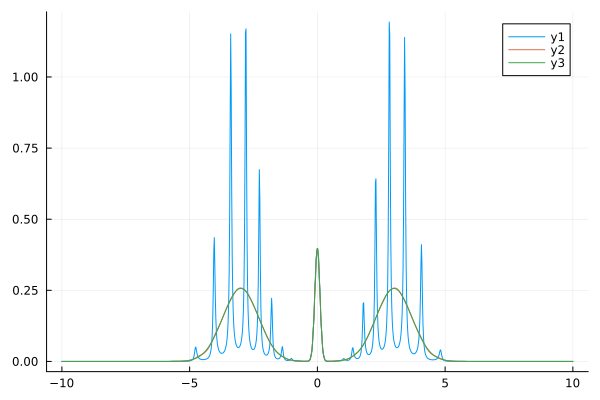

In [13]:
plot()
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val))/pi)
plot!(omegas, rho.(omegas))
#savefig("picture.png")

In [11]:
#=
plot(xlim = [-6,6],
    legend = :topright,
    #ymirror = true, 
    xticks = [5,0,-5],
    yticks = [0.3,0,-0.3],
    xtickfont=font(15), 
    ytickfont=font(15), 
    guidefont=font(25), 
    legendfont=font(20))
plot!(xlabel=latexstring("\\omega"))
plot!(ylabel=latexstring("\\rho"))
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val/pi),label="non-opt",lw=3)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val)/pi),label="opt",lw=3)
plot!(omegas, rho.(omegas), label="exact",lw=1.5,ls=:dash,lc=:black)
#savefig("two_peak.svg")
=#

In [12]:
open("data/kondo_wo_opt.dat","w") do f
    for i in 1:wo_sol.reals.N_real
        println(f, "$(Float64(real.(wo_sol.reals.freq[i])))",  "\t", "$(Float64(imag.(wo_sol.reals.val[i]/pi)))")
    end
end
open("data/kondo_w_opt.dat","w") do g
    for i in 1:sol.reals.N_real
        println(g, "$(Float64(real.(sol.reals.freq[i])))",  "\t", "$(Float64(imag.(sol.reals.val[i]/pi)))")
    end
end
open("data/kondo_exact.dat","w") do h
    for i in 1:length(omegas)
        println(h, omegas[i],  "\t", rho(omegas[i]))
    end
end